# Módulo 2: HTML: Requests y BeautifulSoup
## Parsing Pagina12

<img src='https://www.pagina12.com.ar/assets/media/logos/logo_pagina_12_n.svg?v=1.0.178' width=300></img>
En este módulo veremos cómo utilizar las bibliotecas `requests` y `bs4` para programar scrapers de sitios HTML. Nos propondremos armar un scraper de noticias del diario <a href='www.pagina12.com.ar'>Página 12</a>.

Supongamos que queremos leer el diario por internet. Lo primero que hacemos es abrir el navegador, escribir la URL del diario y apretar Enter para que aparezca la página del diario. Lo que ocurre en el momento en el que apretamos Enter es lo siguiente:
1. El navegador envía una solicitud a la URL pidiéndole información.
2. El servidor recibe la petición y procesa la respuesta.
3. El servidor envía la respuesta a la IP de la cual recibió la solicitud.
4. Nuestro navegador recibe la respuesta y la muestra **formateada** en pantalla.

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automática para luego extraer la información deseada de la respuesta. Utilizaremos `requests` para realizar peticiones y recibir las respuestas y `bs4` para *parsear* la respuesta y extraer la información.<br>
Te dejo unos links que tal vez te sean de utilidad:
- [Códigos de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
- [Documentación de requests](https://requests.kennethreitz.org/en/master/)
- [Documentación de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [40]:
import requests

In [41]:
url = 'https://www.pagina12.com.ar/'

In [42]:
p12 = requests.get(url)

In [43]:
p12.status_code

200

In [44]:
p12.content

src="https://images.pagina12.com.ar/styles/focal_16_9_470x264/public/rest_images/mujeres-invisibles-un-documental_0.jpg?itok=nAjYcstA" alt=""></div></a></div></div><div class="block-content"><div class="headline-content"><div class="headline-plaque"><div class="suplement-logo product-octubretv"></div></div><div class="article-title "><a href="https://octubretv.com/videos/peliculas/mujeres-invisibles/" target="_blank" ">Mujeres <span class="title-separator">invisibles</span> <span class="title-prefix">Relatos \xc3\xadntimos de mujeres que nos hacen mirar desde otra perspectiva a nuestra sociedad.</span></a></a></div><div class="time-author-wrapper article-ta "></div></div></div></article></div></div><div class="columns small-12 medium-4 index-1"> <div class="headline-card headline-1 "><article class="headline-card-inner"><div class="block-multimedia"><div class="multimedia-container"><a href="https://octubretv.com/videos/muejeres-pelicula-colectiva-realizada-por-mujeres-de-argentina/" t

Muchas veces la respuesta a la solicitud puede ser algo que no sea un texto: una imagen, un archivo de audio, un video, etc.

In [45]:
p12.text

" alt=""><img class="show-for-xlarge  lazyload" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif?v=1.0.277" data-src="https://images.pagina12.com.ar/styles/focal_16_9_470x264/public/rest_images/mujeres-invisibles-un-documental_0.jpg?itok=nAjYcstA" alt=""></div></a></div></div><div class="block-content"><div class="headline-content"><div class="headline-plaque"><div class="suplement-logo product-octubretv"></div></div><div class="article-title "><a href="https://octubretv.com/videos/peliculas/mujeres-invisibles/" target="_blank" ">Mujeres <span class="title-separator">invisibles</span> <span class="title-prefix">Relatos íntimos de mujeres que nos hacen mirar desde otra perspectiva a nuestra sociedad.</span></a></a></div><div class="time-author-wrapper article-ta "></div></div></div></article></div></div><div class="columns small-12 medium-4 index-1"> <div class="headline-card headline-1 "><article class="headline-card-inner"><div class="block-multimedia"><div class="

Analicemos otros elementos de la respuesta

In [46]:
p12.headers

{'Date': 'Thu, 11 Mar 2021 22:52:04 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d84f7c7892c66c1ce1e607d31d4d20d3f1615503124; expires=Sat, 10-Apr-21 22:52:04 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-ETag': 'W/"61596-HyOFBd/fqNWzTwT3Fca17Bkp89M"', 'X-Backend': 'frontend', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '0', 'grace': '86400.000 none', 'ttl': '119.313', 'X-Instance': 'cache-front-prod-varnish-68cf7d4bd6-8jn2n', 'x-restarts': '0', 'X-Cache': 'HIT (5)', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '08c5167f280000f883d13f4000000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/bea

In [47]:
p12.request.headers

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

El contenido de la request que acabamos de hacer está avisando que estamos utilizando la biblioteca requests para python y que no es un navegador convencional. Se puede modificar

In [48]:
p12.cookies

<RequestsCookieJar[Cookie(version=0, name='__cfduid', value='d84f7c7892c66c1ce1e607d31d4d20d3f1615503124', port=None, port_specified=False, domain='.pagina12.com.ar', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=False, expires=1618095124, discard=False, comment=None, comment_url=None, rest={'HttpOnly': None, 'SameSite': 'Lax'}, rfc2109=False)]>

In [49]:
from bs4 import BeautifulSoup

In [50]:
s = BeautifulSoup(p12.text, 'lxml')

In [51]:
type(s)

bs4.BeautifulSoup

In [52]:
print(s.prettify())

/retrospectiva-vanessa-ragone/" target="_blank">
                   Retrospectiva de Vanessa
                   <span class="title-separator">
                    Ragone
                   </span>
                   <span class="title-prefix">
                    Documentales exclusivos de la realizadora y productora.
                   </span>
                  </a>
                 </div>
                 <div class="time-author-wrapper article-ta">
                 </div>
                </div>
               </div>
              </article>
             </div>
            </div>
           </div>
           <div class="headline-block-inner">
           </div>
          </div>
         </div>
        </div>
       </div>
      </div>
      <div class="ad-sticky-right-col show-for-large" id="ad-sticky-right-col">
       <div class="ad-sticky-home-right" id="ad-sticky-home-right">
        <div id="div-gpt-ad-1510753058979-0">
        </div>
       </div>
      </div>
     </div>
    </

Primer ejercicio: obtener un listado de links a las distintas secciones del diario.<br>
Usar el inspector de elementos para ver dónde se encuentra la información.

In [53]:
s.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'})

<ul class="horizontal-list main-sections hide-on-dropdown"><li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li><li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li><li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li><li class="no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li><li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li><li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li><li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/psicologia">Psicología</a></li></ul>

In [54]:
secciones = s.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
secciones

[<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/psicologia">Psicología</a></li>]

## Clase 6
Vamos a empezar a extraer información contenida en los tags. A veces puede ser el texto del tag o puede ser algún atributo

In [55]:
[seccion.text for seccion in secciones]

['El país',
 'Economía',
 'Sociedad',
 'Cultura y Espectáculos',
 'Deportes',
 'El mundo',
 'Psicología']

In [56]:
seccion = secciones[0]
seccion

<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>

In [57]:
seccion.a

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [58]:
seccion.a.get_text()

'El país'

In [59]:
seccion.a.get('href') # para tomar el link 

'https://www.pagina12.com.ar/secciones/el-pais'

Estamos interesados en los links, no en el texto

In [60]:
links_secciones = [seccion.a.get('href') for seccion in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/psicologia']

Carguemos la página de una sección para ver cómo se compone

In [61]:
sec = requests.get(links_secciones[0])

In [62]:
sec.status_code

200

In [63]:
sec.request.url

'https://www.pagina12.com.ar/secciones/el-pais'

In [64]:
soup_seccion = BeautifulSoup(sec.text, 'lxml')

In [65]:
print(soup_seccion.prettify())

c/templates/partials/amp/articles/components/multimedia_badge.dust/ -->
                    </div>
                    <!-- Authors & Date -->
                    <div class="article-item__footer">
                     <div class="date is-display-inline">
                      11 de marzo de 2021
                     </div>
                    </div>
                    <!-- DUST PATH: /usr/src/app/src/templates/partials/amp/lists/articles_list_item.dust/ -->
                    <!-- DUST PATH: /usr/src/app/src/templates/partials/amp/articles/article_teaser.dust/ -->
                    <article class="article-item article-item--teaser">
                     <!-- Image -->
                     <div class="article-item__header">
                      <a href="https://www.pagina12.com.ar/328764-los-correligionarios-se-sacan-chispas-mario-negri-vs-martin-">
                       <!-- DUST PATH: /usr/src/app/node_modules/frontend-core/views/widgets/fc_displayImg_amp.dust/ -->
            

La página se divide en un artículo promocionado y una lista `<ul>` con el resto de los artículos

In [66]:
featured_article = soup_seccion.find('div', attrs={'class':'articles-list'})
featured_article

<div class="articles-list is-grid-col2 grid-mobile-row"><!-- DUST PATH: /usr/src/app/src/templates/partials/amp/lists/articles_list_item.dust/ --><!-- DUST PATH: /usr/src/app/src/templates/partials/amp/articles/featured_article.dust/ --><article class="article-item article-item--featured"><!-- Image --><div class="article-item__header"><a href="https://www.pagina12.com.ar/328876-derivan-a-comodoro-py-la-denuncia-por-las-bolsas-mortuorias-"><!-- DUST PATH: /usr/src/app/node_modules/frontend-core/views/widgets/fc_displayImg_amp.dust/ --><amp-img alt=" (Fuente: Kala Moreno Parra)" class="" height="313" layout="responsive" src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2021-03/147060-bolsas.jpeg?itok=OUN0wCAv" srcset="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2021-03/147060-bolsas.jpeg?itok=OUN0wCAv 470w, https://images.pagina12.com.ar/styles/focal_3_2_300x200/public/2021-03/147060-bolsas.jpeg?itok=dTbaCsIB 300w, https://images.pagina12.com.ar/styl

In [67]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/328876-derivan-a-comodoro-py-la-denuncia-por-las-bolsas-mortuorias-'

In [68]:
article_list = soup_seccion.find('article', attrs={'class':'article-item article-item--teaser'})


In [69]:
article_list

-teaser"><!-- Image --><div class="article-item__header"><a href="https://www.pagina12.com.ar/328847-el-gobierno-porteno-echo-a-33-trabajadores-del-programa-vere"><!-- DUST PATH: /usr/src/app/node_modules/frontend-core/views/widgets/fc_displayImg_amp.dust/ --><amp-img alt="Treinta y tres trabajadores del Frente de Organizaciones en Lucha del programa Veredas Limpias están acampando frente al ministerio de Hacienda de la Ciudad de Buenos Aires luego de haber sido despedidos. " class="" height="200" layout="responsive" src="https://images.pagina12.com.ar/styles/focal_3_2_300x200/public/2021-03/147026-laura-20-283-29.jpeg?itok=fIEy8h-E" width="300"></amp-img><!-- DUST PATH: /usr/src/app/src/templates/partials/amp/articles/components/multimedia_badge.dust/ --></a></div><div class="article-item__content-footer-wrapper gutter-small deco-bar-here-left"><div class="article-item__content"><!-- Article type --><!-- Title and Kicker --><h4 class="is-display-inline title-list"><a class="" href="ht


## RETO
Armar una función que reciba la soup de una página de una sección y devuelva una lista con links a las notas de esa sección.

*Tip*: La función `find` devuelve ```None``` si no encontró el tag

In [70]:
def obtener_notas(soup):
    '''
    Función que recibe un objeto de BeautifulSoup de una página de una sección
    y devuelve una lista de URLs a las notas de esa sección
    '''
    lista_notas = []
    
    # obtener el articulo promocional
    
    featured_articule = soup.find('div', attrs={'class':'articles-list'})
    if featured_articule:
        lista_notas.append(featured_articule.a.get('href'))
    # lista de articulos
    articule_list = soup.find('article', attrs={'class':'article-item article-item--teaser'})
    for article in article_list.find_all('h4'):
        if article.a:
            lista_notas.append(article.a.get('href'))
    
    return lista_notas
    

In [71]:
obtener_notas(soup_seccion)

['https://www.pagina12.com.ar/328876-derivan-a-comodoro-py-la-denuncia-por-las-bolsas-mortuorias-',
 'https://www.pagina12.com.ar/328852-alberto-fernandez-le-apunto-al-juez-gemignani-por-mensaje-ma',
 'https://www.pagina12.com.ar/328847-el-gobierno-porteno-echo-a-33-trabajadores-del-programa-vere',
 'https://www.pagina12.com.ar/328842-quienes-suenan-para-reemplazar-a-marcela-losardo-en-el-minis',
 'https://www.pagina12.com.ar/328832-el-rincon-del-vago-la-ironia-de-cafiero-sobre-macri',
 'https://www.pagina12.com.ar/328825-coronavirus-el-gobierno-confirmo-que-no-cerrara-por-ahora-la',
 'https://www.pagina12.com.ar/328611-contrapunto-en-torno-a-la-posible-vuelta-del-servicio-milita',
 'https://www.pagina12.com.ar/328764-los-correligionarios-se-sacan-chispas-mario-negri-vs-martin-']

## Clase 7
En esta clase te voy a hablar un poco del manejo de errores. Para eso vamos a tomar como ejemplo uno de los links que obtuvimos con la función que tenías que armar en la clase anterior.

Código de error != 200

In [72]:
lista_notas = obtener_notas(soup_seccion)

In [73]:
r = requests.get(url)
r 

<Response [200]>

In [80]:
r.status_code

200

In [81]:
r = requests.get(lista_notas[0])
if r.status_code == 200:
    # Procesamos la respuesta
    print('procesamos..')
else:
     # Informar el error
    print('informamos...')

procesamos..


In [82]:
url_nota = lista_notas[0]
print(url_nota)

https://www.pagina12.com.ar/328876-derivan-a-comodoro-py-la-denuncia-por-las-bolsas-mortuorias-


Supongamos que el link a la nota está mal cargado, o que sacaron la nota del sitio, o que directamente no está funcionando la web de página 12

In [77]:
url_mala = url_nota.replace('2','3')
print(url_mala)

https://www.pagina13.com.ar/338876-derivan-a-comodoro-py-la-denuncia-por-las-bolsas-mortuorias-


In [78]:
r = requests.get(url_mala)
if r.status_code == 200:
    # Procesamos la respuesta
    print('procesamos..')
else:
     # Informar el error
    print('informamos status code != 200')

ConnectionError: HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: /338876-derivan-a-comodoro-py-la-denuncia-por-las-bolsas-mortuorias- (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fd98df937c0>: Failed to establish a new connection: [Errno -2] Name or service not known'))

Obtuvimos un error que interrumpió la ejecución del código. No llegamos a imprimir el status code. Muchas veces estos errores son inevitables y no dependen de nosotros. Lo que sí depende de nosotros es cómo procesarlos y escribir un código que sea robusto y resistente a los errores.

In [ ]:
try:
    nota = requests.get(url_mala)
except:
    print('Error en la request!\n')
    
print('El resto del programa continúa...')

In [ ]:
# Las buenas prácticas de programación incluyen el manejo de errores para darle robustez al código
try:
    nota = requests.get(url_mala)
except Exception as e:
    print('Error en la request:')
    print(e)
    print('\n')
    
print('El resto del programa continúa...')

Lo mismo ocurre cuando encadenamos búsquedas. Retomemos esta línea

In [ ]:
featured_article.a.get('href')

Si no existe el tag "a", obtendremos un error que dice que un objeto None no tiene ningún método .get('href')

In [ ]:
try:
    featured_article.b.get('href')
except:
    pass

In [ ]:
featured_article.b.get('href')

## Clase 8
En esta clase vamos a empezar a descargar el contenido de la nota. Carguémosla


In [88]:
url_nota = lista_notas[0]
print(url_nota)

https://www.pagina12.com.ar/328876-derivan-a-comodoro-py-la-denuncia-por-las-bolsas-mortuorias-


In [89]:
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        # Extraemos el título
        titulo = s_nota.find('h1', attrs={'class':'article-title'})
        print(titulo.text)
        # Extraemos la fecha
        fecha = s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')
        print(fecha)  
        # Extraemos la volanta
        volanta = s_nota.find('h2', attrs={'class':'article-prefix'})
        .get_text()
        print(volanta)  

        #ret_dict[] = 'volanta'
        #if volanta:
        #    ret_dict['volanta'] = volanta.get_text()
        #else:
        #    ret_dict['volanta'] = None      

except Exception as e:
    print('Error:')
    print(e)
    print('\n')

Derivan a Comodoro Py la denuncia por las bolsas mortuorias en Plaza de Mayo
2021-03-11
Por "incitación a la violencia"


## CLASE 9
### Vamos a extraer la imagen        
        

In [90]:
media = s_nota.find('div', attrs={'class':'article-main-media-image'})

In [91]:
imagenes = media.find_all('img')
imagenes

[<img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2021-03/147060-bolsas.jpeg?itok=OUN0wCAv" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/147060-bolsas.jpeg?itok=u92Vkseb" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/147060-bolsas.jpeg?itok=u92Vkseb" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/147060-bolsas.jpeg?itok=u92Vkseb" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-xlarge" data-src="https://images.pagina12.c

Obtuvimos varias imágenes de distintos tamaños que se mostrarán en función del tamaño de la pantalla/navegador. Vemos que están ordenadas por tamaño así que intentaremos obtener la de mayor resolución

In [100]:
if len(imagenes) == 0:
    print('no se encontraron imágenes')
else:
    imagen = imagenes[-1] # la ultima imagen
    print('imagen: \n',imagen )
    img_src = imagen.get('data-src')# solo extraigo data-src
    print('data-src: \n',img_src)

imagen: 
 <img class="lazyload show-for-xlarge" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/147060-bolsas.jpeg?itok=u92Vkseb" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>
data-src: 
 https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/147060-bolsas.jpeg?itok=u92Vkseb


In [102]:
img_req = requests.get(img_src)# requets de la imagen
img_req.status_code

200

In [104]:
img_req.content


SyntaxError: invalid syntax (<ipython-input-104-357d452a5009>, line 1)

In [106]:
# libreria para imagenes
from IPython.display import Image 

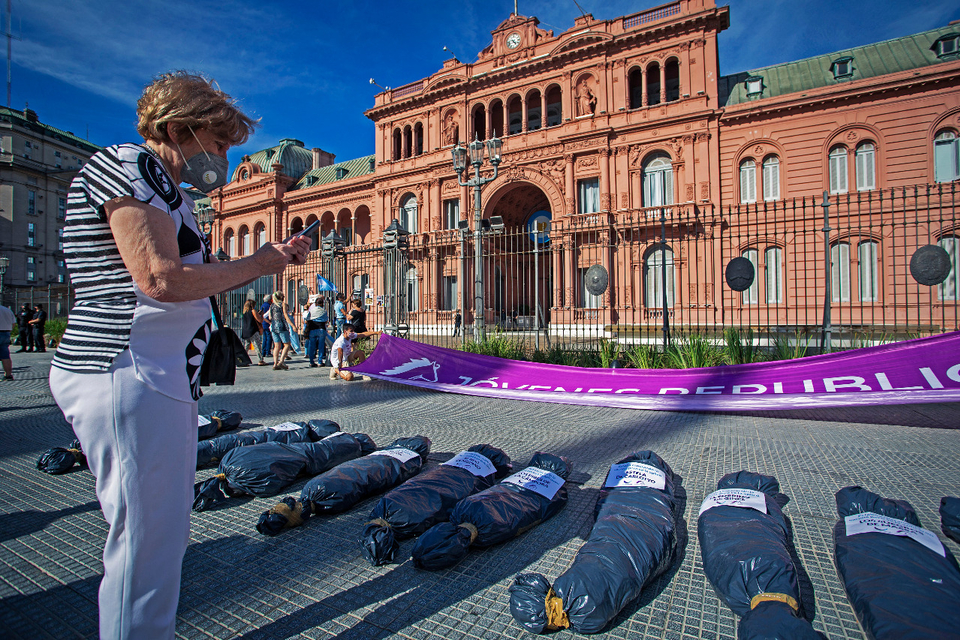

In [107]:
Image(img_req.content)

In [122]:
def obtener_info(s_nota):
    
    # Creamos un diccionario vacío para poblarlo con la información
    ret_dict = {}
    
    # Extraemos la fecha
    fecha = s_nota.find('span', attrs={'pubdate':'pubdate'})
    if fecha:
        ret_dict['fecha'] = fecha.get('datetime')
    else:
        ret_dict['fecha'] = None
    
    # Extraemos el título
    titulo = s_nota.find('div', attrs={'class':'article-title'})
    if titulo:
        ret_dict['titulo'] = titulo.text
    else:
        ret_dict['titulo'] = None

    # Extraemos la volanta
   
    volanta = s_nota.find('h2', attrs={'class':'article-prefix'})
    if volanta:
        ret_dict['volanta'] = volanta.get_text()
    else:
        ret_dict['volanta'] = None
    
    # Extraemos el copete
    copete = s_nota.find('div', attrs={'class':'article-summary'})
    if copete:
        ret_dict['copete'] = volanta.get_text()
    else:
        ret_dict['copete'] = None
    
    autor = s_nota.find('div', attrs={'class':'article-author'})
    if autor:
        ret_dict['autor'] = autor.a.get_text()
    else:
        ret_dict['autor'] = None
    
    # Extraemos la imagen
    media = s_nota.find('div', attrs={'class':'article-main-media-image'})
    if media:
        imagenes = media.find_all('img')
        if len(imagenes) == 0:
            print('no se encontraron imágenes')
        else:
            imagen = imagenes[-1]
            img_src = imagen.get('data-src')
            try:
                img_req = requests.get(img_src)
                if img_req.status_code == 200:
                    ret_dict['imagen'] = img_req.content
                else:
                    ret_dict['imagen'] = None
            except:
                print('No se pudo obtener la imagen')
    else:
        print('No se encontró media')
    
    # Extraemos el cuerpo de la nota
    cuerpo = s_nota.find('div', attrs={'class':'article-text'})
    if cuerpo:
        ret_dict['texto'] = cuerpo.get_text()
    else:
        ret_dict['texto'] = None
    
    return ret_dict

In [116]:
#obtener_info(url_nota)

# Clase 10
En esta clase vamos a utilizar todo lo aprendido para armar el scraper.
Vamos a definir una función que a partir de la URL de una nota, devuelva un diccionario con toda su información

In [123]:
def scrape_nota(url):
    
    try:
        nota = requests.get(url)
    except Exception as e:
        print('Error scrapeando URL', url)
        print(e)
        return None
    
    if nota.status_code != 200:
        print(f'Error obteniendo nota {URL}')
        print(f'Status Code = {nota.status_code}')
        return None
    
    s_nota = BeautifulSoup(nota.text, 'lxml')
    
    ret_dict = obtener_info(s_nota)
    ret_dict['url'] = url
    

    return ret_dict

In [120]:
(url_nota)

'https://www.pagina12.com.ar/328876-derivan-a-comodoro-py-la-denuncia-por-las-bolsas-mortuorias-'

In [124]:
scrape_nota(url_nota)

\xfc:\x9f\x13\xe79w\xce\xd7\xca\x86^\x88\xcb\xfc\xf1\x94\x13\xc0\xa2\xcd\x8a\xfd\xfc\xfe>x\xf2\x83\x80\x0b\xd6\xdd\xcf\xab\xdfy\x9ds\xf3\x00\xa55\x82.o\x83I\xa7\x8f\xa9oX&j\xc5\x8d\x1a\x100hY\x89?\x99\x8d\x8a\xed\x14\xa2\x99\xd1\x08\x1e$\x06\x82:\x08Ek\x1e&\xe2\x98\xb4d\xc0\xbd\x17Jb\x96\x00\xa0Le\xbb\x0c\x02\x878\xbe\xb9K\xa9\x08\xaa\xcf\x9aN\x89\xba2Q\x00t\xafH\x8e\x08\xb0\xd8G\xea\x10\xf9\xd4\xebE\x0c\xb2\xe4\x14Z\xac_\x0b.\x8d\x02kP$aW\xe4\x81a\x11\x07\xd8*\x9a\xe1\x1a2b\xe9\x7f\xdd\x07*\x1a\xf2;\x91myd\r\t \x00\x02@\xb8\xd4\xbc\x0c\x9b\x88\xe2\t\xfe\x02%\xd8\xb8\x88\xb7\x81\x18N\x02\x1d\xe1\xdc\x90P@\x85:\xb8\x16j\xd7.\x11\xd3V2xz;M\x06\xb14\xa2\x95\xb4w\x0bS\xcf\xa9\tX\xf9"\x8dH\xc2\xfd\x125\x00\x94\x92\xdc82\xd8K\x05\xa0\x8bp\x8e$\xacA\xc8Z\xc5\x81C\xa8\xd0\x05\xc4A\x8a\x1b\x05\x01\xad\xa0\x18\xa0bl%8\x0c"&20\xdaQ}\xa0W;l\x98QRW\x10^\x03\xe3\x08\xe9\xe0N\xe7\xb7E\xb3\x8c\x82\xc1\xd8\xf00\x8aDYg@\x05\xcbeE\xa0R\x95S\x96\xc5\x93\x8a\xf4,\x0c\x80\xb2!\x0f\xc0\x88\xa0\xeb\x88\xd1\x8

In [125]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/psicologia']

In [126]:
notas = []
for link in links_secciones:
    try:
        r = requests.get(link)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'lxml')
            notas.extend(obtener_notas(soup))  #agregar los elementos de un interable
        else:
            print('No se pudo obtener la sección', link)
    except:
        print('No se pudo obtener la sección', link)

In [130]:
len(notas)
notas

['https://www.pagina12.com.ar/328987-ya-no-habra-voto-anticipado-en-la-argentina',
 'https://www.pagina12.com.ar/328852-alberto-fernandez-le-apunto-al-juez-gemignani-por-mensaje-ma',
 'https://www.pagina12.com.ar/328847-el-gobierno-porteno-echo-a-33-trabajadores-del-programa-vere',
 'https://www.pagina12.com.ar/328842-quienes-suenan-para-reemplazar-a-marcela-losardo-en-el-minis',
 'https://www.pagina12.com.ar/328832-el-rincon-del-vago-la-ironia-de-cafiero-sobre-macri',
 'https://www.pagina12.com.ar/328825-coronavirus-el-gobierno-confirmo-que-no-cerrara-por-ahora-la',
 'https://www.pagina12.com.ar/328611-contrapunto-en-torno-a-la-posible-vuelta-del-servicio-milita',
 'https://www.pagina12.com.ar/328764-los-correligionarios-se-sacan-chispas-mario-negri-vs-martin-',
 'https://www.pagina12.com.ar/329000-aporte-solidario-en-6-cuotas',
 'https://www.pagina12.com.ar/328852-alberto-fernandez-le-apunto-al-juez-gemignani-por-mensaje-ma',
 'https://www.pagina12.com.ar/328847-el-gobierno-porteno-e

In [131]:
data = []
for i, nota in enumerate(notas):
    print(f'Scrapeando nota {i}/{len(notas)}')
    data.append(scrape_nota(nota))

Scrapeando nota 0/55
Scrapeando nota 1/55
Scrapeando nota 2/55
Scrapeando nota 3/55
Scrapeando nota 4/55
Scrapeando nota 5/55
Scrapeando nota 6/55
Scrapeando nota 7/55
Scrapeando nota 8/55
Scrapeando nota 9/55
Scrapeando nota 10/55
Scrapeando nota 11/55
Scrapeando nota 12/55
Scrapeando nota 13/55
Scrapeando nota 14/55
Scrapeando nota 15/55
Scrapeando nota 16/55
Scrapeando nota 17/55
Scrapeando nota 18/55
Scrapeando nota 19/55
Scrapeando nota 20/55
Scrapeando nota 21/55
Scrapeando nota 22/55
Scrapeando nota 23/55
Scrapeando nota 24/55
Scrapeando nota 25/55
Scrapeando nota 26/55
Scrapeando nota 27/55
Scrapeando nota 28/55
Scrapeando nota 29/55
Scrapeando nota 30/55
Scrapeando nota 31/55
Scrapeando nota 32/55
Scrapeando nota 33/55
Scrapeando nota 34/55
Scrapeando nota 35/55
Scrapeando nota 36/55
Scrapeando nota 37/55
Scrapeando nota 38/55
Scrapeando nota 39/55
Scrapeando nota 40/55
Scrapeando nota 41/55
Scrapeando nota 42/55
Scrapeando nota 43/55
Scrapeando nota 44/55
Scrapeando nota 45/5

In [144]:
len(data)
data[-1]

xac\xae\xdd\xcb7\x13\x1c\xe3P\xce4&x\x96\x84HKQ\xe3A\x93P\x96\x8a\xb4\x07(\xa9w\x9d\xe7Va\x08\xd2\x05\x83u;\xc7\x03\xa5\x99\x08|\x14\\\x05\x14\xc4\xce\x9dt\xbd6\x11\xb6\xd0\x1e\x83q\x9d\x1bTf\xc8\xc7\xaf\x9c\xd3\x1c\x18\x1c\xa6i\x03i\xb3\xcdf{\xd0IR\xee\x08\xdf,m}\x7f\xb0b"n\xe3\xc137|\xe8\x92\xb0\x06\xd0\xde\xd0\xef\x0f\xac\xcew\xd5\xca\x9f;1\xd4\xcc\xf5\'!\x1a\x96\xc6B\xab\xa7\xeb\xce5I\x18.\xd3\x10VSz\xa8\xcdLk\x88\xc6\xe5\xfam\x07\xf2\xe9\x02\xa81[^\xff\x00\xdf\x972#\xf4\x048\xe3\x8b\xfd\xe9a+J\xae&\xf8\xfe\x9dX\xe10\x12\x0cf\x19\xbeK=\xf4\xb9J6,\xb1\xcfyv\xad5IJ\xcbS\xbf\xdd\xcd(\x98\xe1\\\xc69\x8bS:(&C\xad\xb3Y\xc9lL\xf3\xbe\x9b2\xa9\x8e_?g\x1ap\x85\x88\x846x\xce\xd5\xb5u\xa9\x93\x95(\xe313\xd7\xf3\x9d<\x1b\xa5\x8b\xec:\x8e\xa6w\xdfQ&\x01\xb3\xfc#|\xb7WN\xd3\xebf8\xf5w\xcf\xdd\xc8"Y\'\xdc\xcc]\x0c\xe3m\x00\x01X\x9f\x9c}\x9c\xf3\xa3\xd3\x1b\xe3\xf8}t\\q?\x7f\xad\xb4\x10G\x1f\xf6,\xe7d\x9cw\x05\xff\x00\xba\xdf,;a\x9e\xe8\xc7\xda\xd4\x84\xccT\xeb\x1f\xdf\xbf\xc6\x99m\x01\xb7\xc6Lq\x

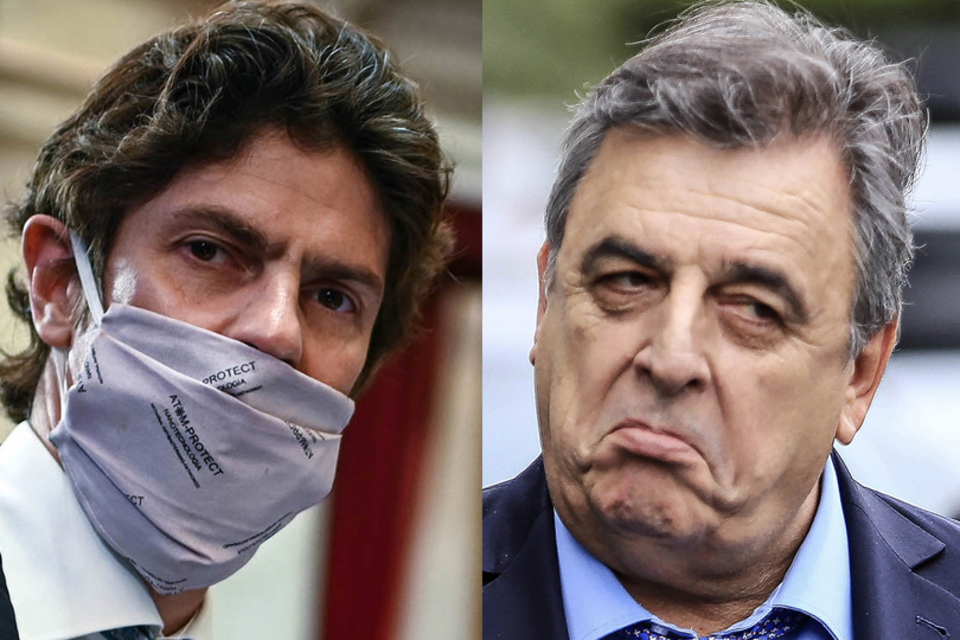

In [145]:
Image(data[-1]['imagen'])

In [139]:
import pandas as pd

In [140]:
df = pd.DataFrame(data) # se crea un data_freme
df.head()

,fecha,titulo,volanta,copete,autor,imagen,texto,url
0,2021-03-11,El bicentenario de la UBA: entre las eleccione...,Derogan los decretos que lo permitían para arg...,Derogan los decretos que lo permitían para arg...,Melisa Molina,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,El Gobierno decidió derogar tres decretos regl...,https://www.pagina12.com.ar/328987-ya-no-habra...
1,2021-03-11,El bicentenario de la UBA: entre las eleccione...,El magistrado de la Cámara de Casación había f...,El magistrado de la Cámara de Casación había f...,Melisa Molina,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"El presidente Alberto Fernández criticó el ""si...",https://www.pagina12.com.ar/328852-alberto-fer...
2,2021-03-11,El bicentenario de la UBA: entre las eleccione...,Acampan para pedirle Rodríguez Larreta que no ...,Acampan para pedirle Rodríguez Larreta que no ...,Melisa Molina,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Treinta y tres trabajadores del Frente de Orga...,https://www.pagina12.com.ar/328847-el-gobierno...
3,2021-03-11,El bicentenario de la UBA: entre las eleccione...,"A horas de que la ministra renuncie, a la danz...","A horas de que la ministra renuncie, a la danz...",Melisa Molina,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Marcela Losardo presentará en las próximas hor...,https://www.pagina12.com.ar/328842-quienes-sue...
4,2021-03-11,El bicentenario de la UBA: entre las eleccione...,A propósito de la presentación del libro del e...,None,Melisa Molina,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Santiago Cafiero estaba dando una nota en tele...,https://www.pagina12.com.ar/328832-el-rincon-d...


In [143]:
df.to_csv('Notas Página12.csv')# guardar data frame en csv